# Quality Analysis

I'm just gonna start with quality because its the most simple and that can help me set the graphing framework for the rest

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
quality_path = r'D:\Andre programmer\Github\Github_Repo\P4\Data\quality.csv'

q_df = pd.read_csv(quality_path)

q_df

,File,Version,ICR,IPR,IMI
0,http://example.com/dbpedia_3-5,0,0.968627,0.808050,1.00000
1,http://example.com/dbpedia_3-5-1,1,0.957198,0.810665,1.00000
2,http://example.com/dbpedia_3-6,2,0.941176,0.818182,1.00000
3,http://example.com/dbpedia_3-7,3,1.040750,0.783183,1.91223
4,http://example.com/dbpedia_3-8,4,0.986072,0.734705,1.02786
5,http://example.com/dbpedia_3-9,5,0.831758,0.585841,1.02268
6,http://example.com/dbpedia_2015-04,6,0.961905,0.482625,1.01224
7,http://example.com/dbpedia_2015-10,7,0.576455,0.482361,1.01218
8,http://example.com/dbpedia_2016-04,8,0.567639,0.483154,1.01194
9,http://example.com/dbpedia_2016-10,9,0.565789,0.481520,1.01184


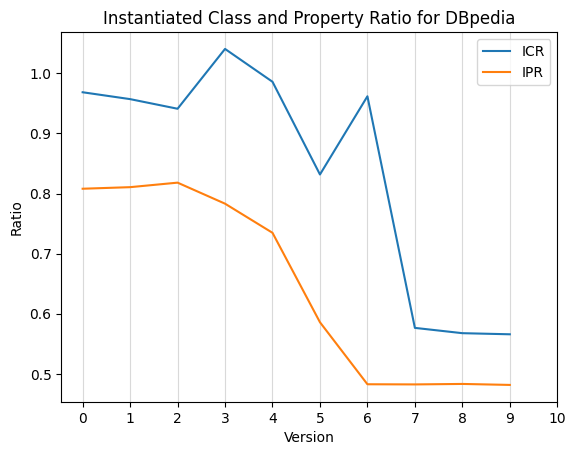

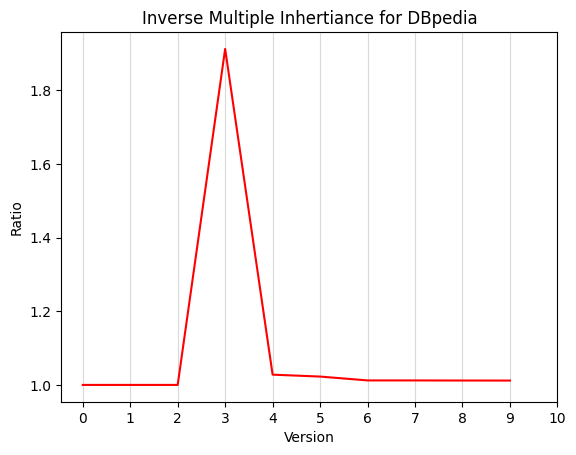

In [15]:
def qual_plots(df):
    #Plot 1
    plt.plot('ICR', data = df)
    plt.plot('IPR', data = df)
    
    plt.xlabel("Version")
    plt.ylabel("Ratio")
    
    plt.legend(loc = 'upper right')
    plt.title('Instantiated Class and Property Ratio for DBpedia')
    
    plt.grid(axis='x', color='0.85')
    plt.xticks(np.arange(0, len(df['ICR'])+1, 1))
    
    plt.show()
    
    #Plot 2
    
    plt.plot('IMI', data = df, color = 'red')
    plt.xlabel("Version")
    plt.ylabel("Ratio")
    plt.title('Inverse Multiple Inhertiance for DBpedia')
    plt.grid(axis='x', color='0.85')
    plt.xticks(np.arange(0, len(df['IMI'])+1, 1))

qual_plots(q_df)